In [1]:
import numpy as np

In [3]:
import pandas as pd

In [7]:
np.random.seed

<function numpy.random.mtrand.seed>

In [15]:
apartments = [f"Apt_(i)" for i in range(1,21)]

In [17]:
dates = pd.date_range(start="2025-07-01",periods=30,freq='D')

In [19]:
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments, len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)* len(apartments))
}

In [21]:
df=pd.DataFrame(data)

In [23]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_(i),19.186079
1,2025-07-02,Apt_(i),24.021749
2,2025-07-03,Apt_(i),18.181611
3,2025-07-04,Apt_(i),23.414915
4,2025-07-05,Apt_(i),20.145907
...,...,...,...
595,2025-07-26,Apt_(i),16.063348
596,2025-07-27,Apt_(i),15.917928
597,2025-07-28,Apt_(i),15.818895
598,2025-07-29,Apt_(i),15.036044


In [25]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [27]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_(i),19.19
1,2025-07-02,Apt_(i),24.02
2,2025-07-03,Apt_(i),18.18
3,2025-07-04,Apt_(i),23.41
4,2025-07-05,Apt_(i),20.15
...,...,...,...
595,2025-07-26,Apt_(i),16.06
596,2025-07-27,Apt_(i),15.92
597,2025-07-28,Apt_(i),15.82
598,2025-07-29,Apt_(i),15.04


In [29]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [31]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.420017
min    2025-07-01 00:00:00           4.220000
25%    2025-07-08 00:00:00          15.815000
50%    2025-07-15 12:00:00          19.120000
75%    2025-07-23 00:00:00          22.842500
max    2025-07-30 00:00:00          34.550000
std                    NaN           5.225935


In [35]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [41]:
import numpy as np
import pandas as pd
np.random.seed(42)
apartments=[f"apy_{i}" for i in range (1,21)]
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))}
df=pd.DataFrame(data)
df
df["Electricity_usage"]=df["Electricity_usage"].round(2)
df
print(df.isnull().sum())
print(df.describe())
print(df.dtypes)
usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64
                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071
Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object
Apartment
apy_11    642.31
apy_6     641.82
apy_13    634.22
apy_10    616.09
apy_20    613.14
apy_7     609.87
apy_8     607.18
apy_16    606.97
apy_14    604.33
apy_3     601.93
apy_4     596.99
apy_15    591.38
apy_19    586.61
apy_5     585.76
apy_2     581.81
apy_9     578.48
apy_1     571.80
apy_17    570.33
apy_12    568.99
apy_18    549.49
Name: Electricity_usage, dtype: 

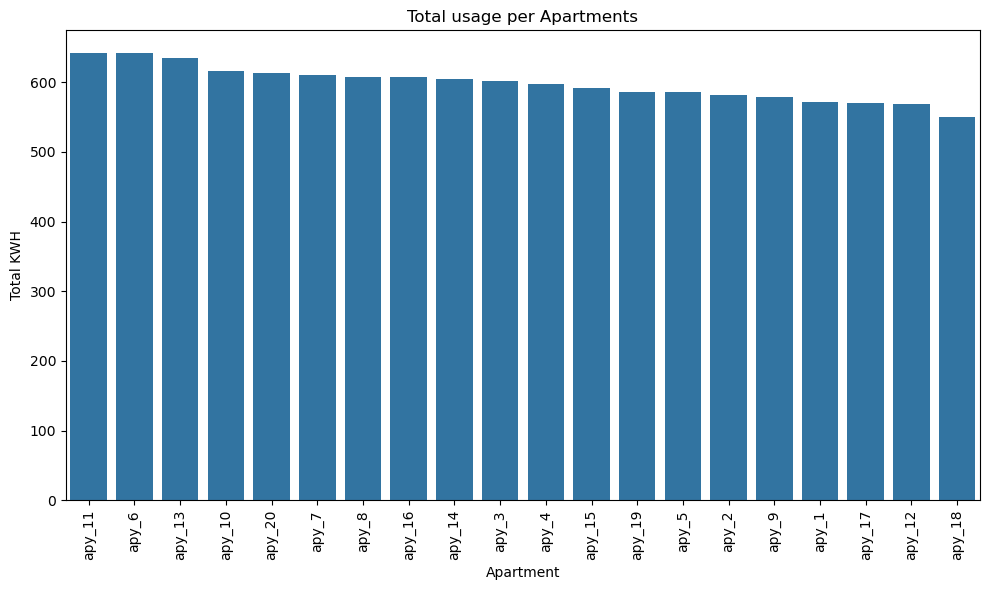

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

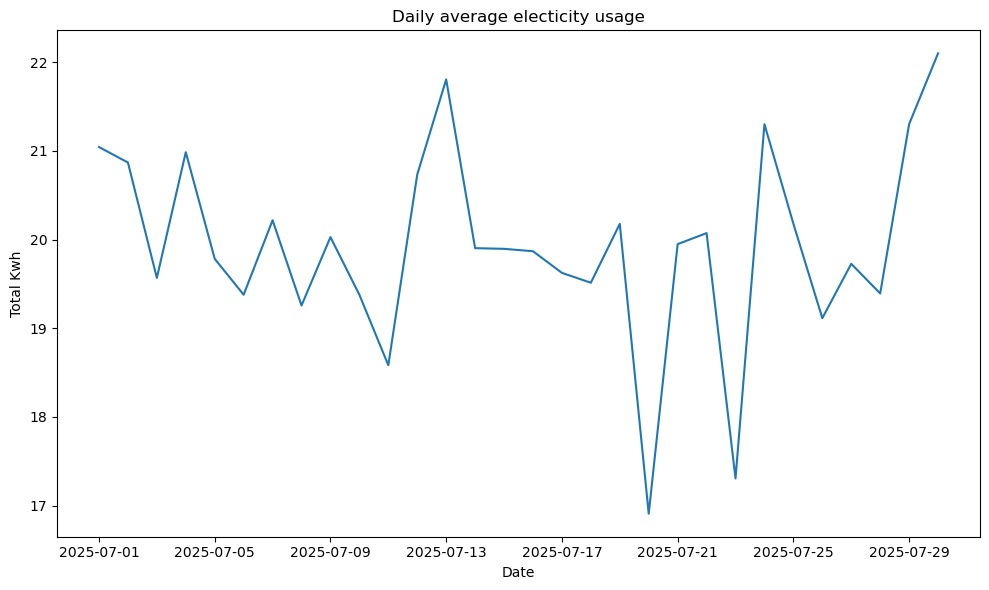

In [47]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electicity usage")
plt.xlabel("Date")
plt.ylabel("Total Kwh")
plt.tight_layout()
plt.show()

In [49]:
threshold= df["Electricity_usage"].mean()+2 *df ["Electricity_usage"].std()
df["High_Usage_flag"]=df["Electricity_usage"] > threshold
print (df[df ["High_Usage_flag"] == True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
113 2025-07-24     apy_4              32.32             True
125 2025-07-06     apy_5              30.95             True
179 2025-07-30     apy_6              33.60             True
209 2025-07-30     apy_7              39.26             True
220 2025-07-11     apy_8              31.57             True
